# 🔥 Algerian Forest Fire Index Prediction using Ridge Regression
**By Dibyo Chakraborty**

This notebook builds a Ridge Regression model to predict the **Fire Weather Index (FWI)** based on environmental conditions from Algerian forest fire datasets.

Key steps:
- Data Cleaning and Exploration
- Feature Engineering (date transformations, polynomial features)
- Skewness handling and scaling
- Ridge Regression (manual and cross-validated)
- Evaluation using R², Adjusted R², and visualization


In [430]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split


In [431]:
df=pd.read_csv("Algeria.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [432]:
df1=pd.read_csv("Algeria_update.csv")
df1.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [434]:
df.drop('Classes',axis=1).cov()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,78.190729,-0.003639,0.0,3.119138,-9.969476,1.188603,-1.993174,28.544043,53.863133,222.524339,6.632060,65.061368,23.079143,0.003639
month,-0.003639,1.242764,0.0,-0.229653,-0.681903,-0.124987,0.077762,0.272433,0.938676,6.722457,0.303838,1.349400,0.685464,0.001037
year,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Temperature,3.119138,-0.229653,0.0,13.162670,-35.043482,-2.901949,-2.372850,35.222858,21.837668,65.071727,9.101371,23.734918,15.297068,0.489984
RH,-9.969476,-0.681903,0.0,-35.043482,219.874333,10.173809,6.604836,-137.215388,-75.071928,-160.400449,-42.298446,-74.653741,-64.096917,-2.991651
Ws,1.188603,-0.124987,0.0,-2.901949,10.173809,7.903887,0.965886,-6.718952,-0.025120,10.604530,0.099643,1.257586,0.677079,-0.255178
Rain,-1.993174,0.077762,0.0,-2.372850,6.604836,0.965886,4.012837,-15.634746,-7.169025,-28.456455,-2.891688,-8.546509,-4.835502,-0.040159
FFMC,28.544043,0.272433,0.0,35.222858,-137.215388,-6.718952,-15.634746,205.912204,107.342972,347.051372,44.113113,120.872510,73.791799,1.597815
DMC,53.863133,0.938676,0.0,21.837668,-75.071928,-0.025120,-7.169025,107.342972,153.587434,517.427748,35.032228,173.203205,80.764530,1.192729
DC,222.524339,6.722457,0.0,65.071727,-160.400449,10.604530,-28.456455,347.051372,517.427748,2272.009994,100.718521,638.862525,262.277746,-1.880308


In [435]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [436]:
df.isna().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [437]:
df['year'].unique()

array([2012])

In [438]:
df.drop('year',axis=1,inplace=True)

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3   RH           243 non-null    int64  
 4   Ws           243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    object 
 13  Region       243 non-null    int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 26.7+ KB


In [440]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [441]:
df['Region'].unique()

array([0, 1])

In [442]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

#These are categorical, Dont really think we should use it in LinReg...

In [443]:
df.drop('Classes',axis=1,inplace=True)

In [444]:
df.drop('Region',axis=1,inplace=True)

In [445]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


<Axes: xlabel='Rain', ylabel='Count'>

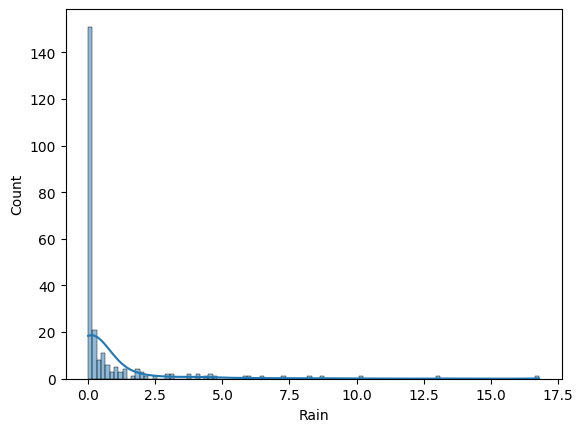

In [446]:
sns.histplot(df['Rain'],kde=True)

In [447]:
df['month'].value_counts()

,count
month,
8,62
7,61
6,60
9,60


<Axes: xlabel='FWI', ylabel='Count'>

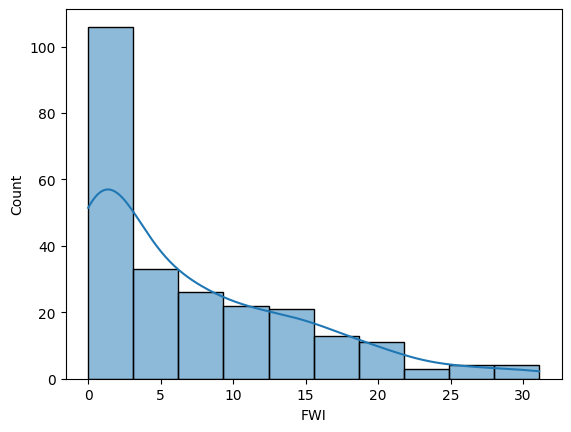

In [448]:
sns.histplot(df['FWI'],kde=True)

###feels like robust scaler normalization scenario ngl

In [449]:
rscaler=RobustScaler()
sscaler=StandardScaler()
mmscaler=MinMaxScaler()

In [450]:
ridgeModel=Ridge(alpha=1.0)

<Axes: xlabel='day', ylabel='Count'>

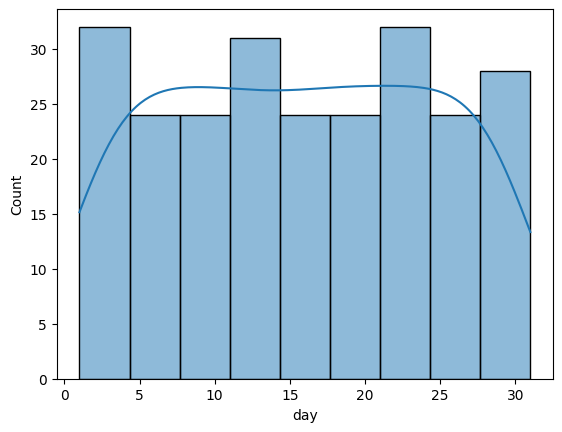

In [451]:
sns.histplot(df['day'],kde=True)

In [452]:
df.corr(numeric_only=True)['FWI'].sort_values(ascending=False)


,FWI
FWI,1.000000
ISI,0.922895
DMC,0.875864
BUI,0.857973
DC,0.739521
FFMC,0.691132
Temperature,0.566670
day,0.350781
month,0.082639
Ws,0.032368


<Axes: xlabel='day', ylabel='FWI'>

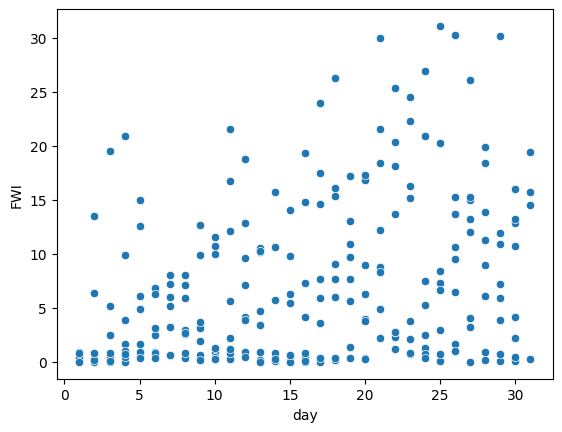

In [453]:
sns.scatterplot(x='day', y='FWI', data=df)


In [454]:
import numpy as np
import pandas as pd


df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)


month_mapping = {6: 0, 7: 1, 8: 2, 9: 3}
df['month_encoded'] = df['month'].map(month_mapping)


df = df.drop(['day', 'month'], axis=1)


In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    243 non-null    int64  
 1   RH             243 non-null    int64  
 2   Ws             243 non-null    int64  
 3   Rain           243 non-null    float64
 4   FFMC           243 non-null    float64
 5   DMC            243 non-null    float64
 6   DC             243 non-null    float64
 7   ISI            243 non-null    float64
 8   BUI            243 non-null    float64
 9   FWI            243 non-null    float64
 10  day_sin        243 non-null    float64
 11  day_cos        243 non-null    float64
 12  month_encoded  243 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 24.8 KB


In [456]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,day_sin,day_cos,month_encoded
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.201299,0.979530,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.394356,0.918958,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.571268,0.820763,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.724793,0.688967,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.848644,0.528964,0


In [457]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [458]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,day_sin,day_cos,month_encoded
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.201299,0.979530,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.394356,0.918958,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.571268,0.820763,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.724793,0.688967,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.848644,0.528964,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,-0.848644,0.528964,3
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,-0.724793,0.688967,3
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,-0.571268,0.820763,3
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,-0.394356,0.918958,3


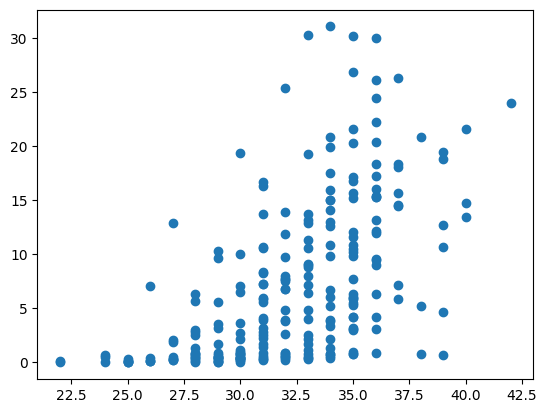

In [459]:
plt.scatter(X['Temperature'],y)

-1.320130116085296


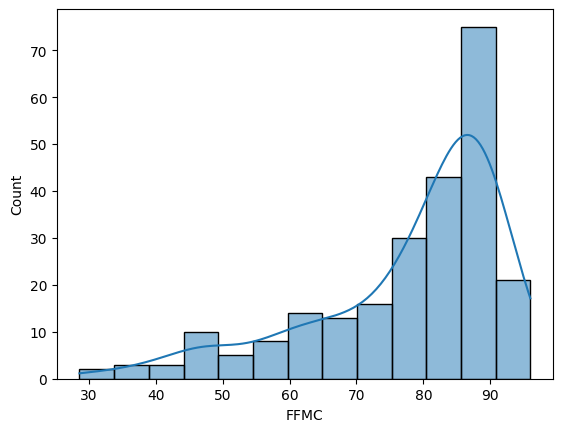

In [460]:
sns.histplot(X['FFMC'],kde=True)
print(X['FFMC'].skew())

##Here , every remaining feature was checked for the kde graph and skew value , to determine wether to transform or not

In [461]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [462]:
poly = PolynomialFeatures(degree=2, include_bias=False)


ffmc_train_poly = poly.fit_transform(x_train[['FFMC']])
ffmc_test_poly = poly.transform(x_test[['FFMC']])


poly_feature_names = poly.get_feature_names_out(['FFMC'])


ffmc_train_df = pd.DataFrame(ffmc_train_poly, columns=poly_feature_names, index=x_train.index)
ffmc_test_df = pd.DataFrame(ffmc_test_poly, columns=poly_feature_names, index=x_test.index)


x_train = pd.concat([x_train.drop(columns=['FFMC']), ffmc_train_df], axis=1)
x_test = pd.concat([x_test.drop(columns=['FFMC']), ffmc_test_df], axis=1)


##In the FFMC plot, a curvy plotting was detected, hence the use of Polynomial Feature for it..

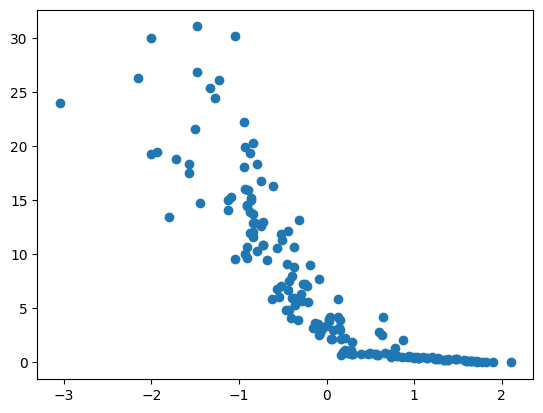

In [491]:
plt.scatter(x_train['FFMC'],y_train)

In [463]:
x_train.head()

,Temperature,RH,Ws,Rain,DMC,DC,ISI,BUI,day_sin,day_cos,month_encoded,FFMC,FFMC^2
29,33,50,14,0.0,22.9,92.8,7.2,28.3,-0.201299,0.979530,0,88.7,7867.69
120,26,80,16,1.8,2.9,7.7,0.3,3.0,-0.394356,0.918958,3,47.4,2246.76
114,32,54,11,0.5,7.9,30.4,1.2,9.6,-0.998717,-0.050649,3,73.7,5431.69
241,24,54,18,0.1,4.3,15.2,1.7,5.1,-0.394356,0.918958,3,79.7,6352.09
5,31,67,14,0.0,5.8,22.2,3.1,7.0,0.937752,0.347305,0,82.6,6822.76


In [464]:

x_train['Temperature'] = sscaler.fit_transform(x_train[['Temperature']]).ravel()
x_test['Temperature'] = sscaler.transform(x_test[['Temperature']]).ravel()


In [465]:


x_train['Ws'] = sscaler.fit_transform(x_train[['Ws']]).ravel()
x_test['Ws'] = sscaler.transform(x_test[['Ws']]).ravel()


In [466]:



x_train['RH'] = sscaler.fit_transform(x_train[['RH']]).ravel()
x_test['RH'] = sscaler.transform(x_test[['RH']]).ravel()


In [467]:
x_train['Rain_Log']=np.log1p(x_train['Rain'])
x_test['Rain_Log']=np.log1p(x_test['Rain'])

In [468]:
x_train.head()

,Temperature,RH,Ws,Rain,DMC,DC,ISI,BUI,day_sin,day_cos,month_encoded,FFMC,FFMC^2,Rain_Log
29,0.261317,-0.862612,-0.591705,0.0,22.9,92.8,7.2,28.3,-0.201299,0.979530,0,88.7,7867.69,0.000000
120,-1.646457,1.165660,0.173237,1.8,2.9,7.7,0.3,3.0,-0.394356,0.918958,3,47.4,2246.76,1.029619
114,-0.011222,-0.592176,-1.739117,0.5,7.9,30.4,1.2,9.6,-0.998717,-0.050649,3,73.7,5431.69,0.405465
241,-2.191535,-0.592176,0.938178,0.1,4.3,15.2,1.7,5.1,-0.394356,0.918958,3,79.7,6352.09,0.095310
5,-0.283761,0.286742,-0.591705,0.0,5.8,22.2,3.1,7.0,0.937752,0.347305,0,82.6,6822.76,0.000000


In [469]:
x_train.drop('Rain',axis=1,inplace=True)
x_test.drop('Rain',axis=1,inplace=True)

In [470]:
x_train['Rain_Log']=sscaler.fit_transform(x_train[['Rain_Log']]).ravel()
x_test['Rain_Log']=sscaler.transform(x_test[['Rain_Log']]).ravel()

In [471]:
x_train.head()

,Temperature,RH,Ws,DMC,DC,ISI,BUI,day_sin,day_cos,month_encoded,FFMC,FFMC^2,Rain_Log
29,0.261317,-0.862612,-0.591705,22.9,92.8,7.2,28.3,-0.201299,0.979530,0,88.7,7867.69,-0.569687
120,-1.646457,1.165660,0.173237,2.9,7.7,0.3,3.0,-0.394356,0.918958,3,47.4,2246.76,1.155596
114,-0.011222,-0.592176,-1.739117,7.9,30.4,1.2,9.6,-0.998717,-0.050649,3,73.7,5431.69,0.109731
241,-2.191535,-0.592176,0.938178,4.3,15.2,1.7,5.1,-0.394356,0.918958,3,79.7,6352.09,-0.409980
5,-0.283761,0.286742,-0.591705,5.8,22.2,3.1,7.0,0.937752,0.347305,0,82.6,6822.76,-0.569687


In [472]:
x_train['DMC']=np.log1p(x_train['DMC'])
x_test['DMC']=np.log1p(x_test['DMC'])

In [473]:
x_train['DC']=np.log1p(x_train['DC'])
x_test['DC']=np.log1p(x_test['DC'])

In [474]:
x_train['ISI']=np.log1p(x_train['ISI'])
x_test['ISI']=np.log1p(x_test['ISI'])

In [475]:
x_train['BUI']=np.log1p(x_train['BUI'])
x_test['BUI']=np.log1p(x_test['BUI'])

In [476]:

x_train['FFMC'] = x_train['FFMC'].max() + 1 - x_train['FFMC']
x_train['FFMC'] = np.log1p(x_train['FFMC'])

x_test['FFMC'] = x_test['FFMC'].max() + 1 - x_test['FFMC']
x_test['FFMC'] = np.log1p(x_test['FFMC'])


In [477]:
cols_to_scale = ['FFMC', 'DMC', 'DC', 'ISI', 'BUI']
for col in cols_to_scale:
    scaler = StandardScaler()
    x_train[col] = scaler.fit_transform(x_train[[col]]).ravel()
    x_test[col]  = scaler.transform(x_test[[col]]).ravel()


In [478]:
x_train.head()

,Temperature,RH,Ws,DMC,DC,ISI,BUI,day_sin,day_cos,month_encoded,FFMC,FFMC^2,Rain_Log
29,0.261317,-0.862612,-0.591705,0.872454,1.072357,0.834746,0.967990,-0.201299,0.979530,0,-0.813810,7867.69,-0.569687
120,-1.646457,1.165660,0.173237,-1.311777,-1.329965,-1.596526,-1.396642,-0.394356,0.918958,3,1.644053,2246.76,1.155596
114,-0.011222,-0.592176,-1.739117,-0.317706,-0.033267,-0.902044,-0.239366,-0.998717,-0.050649,3,0.579798,5431.69,0.109731
241,-2.191535,-0.592176,0.938178,-0.942220,-0.701877,-0.631700,-0.895529,-0.394356,0.918958,3,0.168337,6352.09,-0.409980
5,-0.283761,0.286742,-0.591705,-0.641959,-0.339038,-0.080259,-0.573540,0.937752,0.347305,0,-0.082006,6822.76,-0.569687


<Axes: xlabel='FFMC^2', ylabel='Count'>

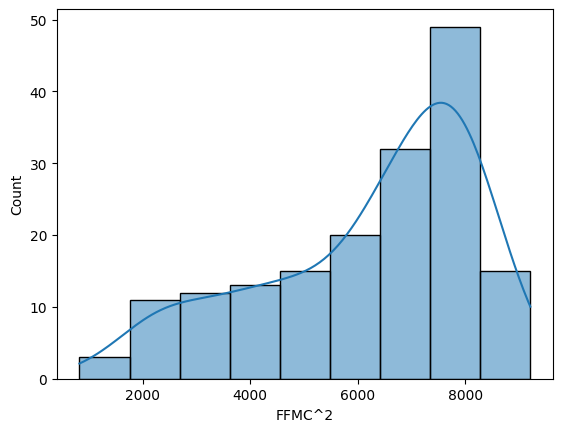

In [479]:
sns.histplot(x_train['FFMC^2'],kde=True)

In [480]:
x_train['FFMC^2']=sscaler.fit_transform(x_train[['FFMC^2']]).ravel()
x_test['FFMC^2']=sscaler.transform(x_test[['FFMC^2']]).ravel()

In [481]:
ridgeModel.fit(x_train,y_train)

Ridge()

In [482]:
y_pred=ridgeModel.predict(x_test)

In [483]:
y_pred

array([11.11534406,  9.34615514,  1.07525238,  7.01608719, 10.37789858,
        1.51924949,  3.74276474, 10.34350473,  0.9490402 ,  6.47068023,
       -1.97869052,  9.33560849, 13.16726391, 18.2551345 , 19.74540625,
        1.3192722 ,  4.71130874, -2.15318503,  8.91714449,  3.56422495,
        1.54002957,  1.20015711,  9.33153754,  0.99339737, 25.4494181 ,
        5.8867598 ,  6.57174664, 11.84649575, -0.63264132, 12.67970852,
        9.26483774,  0.18621254, 13.06626559, 15.55190238,  1.40735744,
        0.27398637,  2.02649965,  7.94558941, -1.02538662,  2.53822257,
        8.66787145,  3.43639377, 12.12743691, -2.92509185, 19.11512313,
       10.09224028,  9.3031111 ,  0.6678871 , 15.72728957,  3.52611022,
       26.40747873,  7.36058338, 17.88752833, 19.52308955, 17.50502943,
       14.45902086,  0.2804028 , 12.51859565,  5.33825433, 18.56448483,
        7.55527269,  1.74160053, -0.28800845, 26.50222245,  4.58761148,
        2.48434772, 12.01484073,  9.76702002, 13.56026906, -1.48

In [484]:
r2_score(y_test,y_pred)

0.8743379607252717

In [485]:
from sklearn.linear_model import RidgeCV

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=5)
ridge_cv.fit(x_train, y_train)

print("Best alpha:", ridge_cv.alpha_)


Best alpha: 1.0


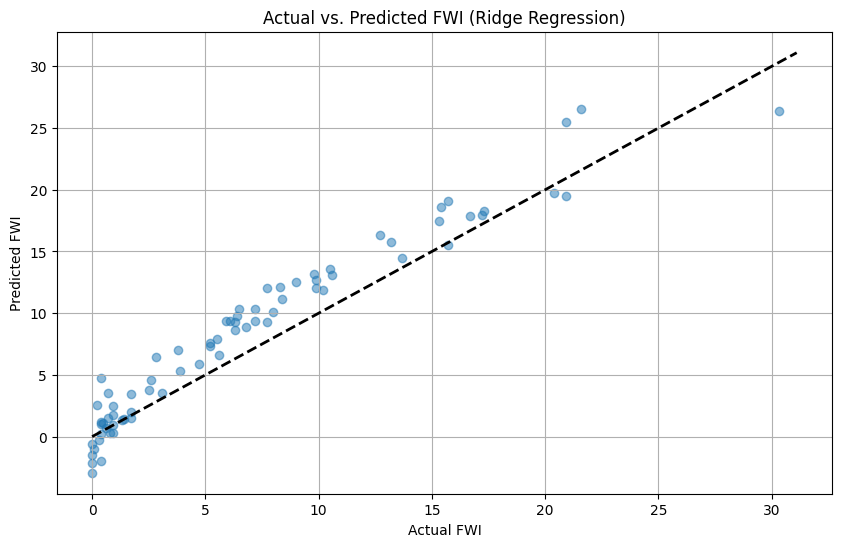

In [495]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs. Predicted FWI (Ridge Regression)")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()


In [487]:
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = x_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.8466497147833825


## ✅ Conclusion

- Best alpha (via CV): **1.0**
- Final R² on test set: **0.8743**
- Adjusted R²: **≈ 0.8466**
- Major gain came from:
  - Skewed feature handling
  - Polynomial expansion of FFMC
  - Robust preprocessing pipeline

This model provides a strong predictive baseline for FWI, useful in fire risk forecasting.




##NOTE:- I made a mistake initially as an ML-beginner.. I transformed and scaled the 'X' itself causing data leakage.. fixed it by reassigning values again and splitting to x_train and x_test before transformation and scaling.. Do look out :)